### Задание
На вебинаре мы говорили что долгое время CNN и RNN архитектуры были конкурирующими, выяснить какая архитектура больше подходит для задачи сентимент анализа на данных с вебинара

<li>построить свёрточную архитектуру
<li>построить различные архитектуры с RNN
<li>построить совместные архитектуры CNN -> RNN и/или (RNN -> CNN)
<br>сделать выводы что получилось лучше

In [1]:
import pandas as pd
import numpy as np
import nltk
from stop_words import get_stop_words
from string import punctuation
from pymorphy2 import MorphAnalyzer
import re

In [2]:
#nltk.download('stopwords')

In [3]:
df_train = pd.read_csv("data/train.csv",delimiter=",",header=0)
df_test = pd.read_csv("data/test.csv",delimiter=",",header=0)
df_val = pd.read_csv("data/val.csv",delimiter=",",header=0)
#df_val = df_test[:(len(df_test)//2)]
#df_test = df_test[(len(df_test)//2):]

In [4]:
df_train

,id,text,class
0,0,@alisachachka не уезжаааааааай. :(❤ я тоже не ...,0
1,1,RT @GalyginVadim: Ребята и девчата!\nВсе в кин...,1
2,2,RT @ARTEM_KLYUSHIN: Кто ненавидит пробки ретви...,0
3,3,RT @epupybobv: Хочется котлету по-киевски. Зап...,1
4,4,@KarineKurganova @Yess__Boss босапопа есбоса н...,1
...,...,...,...
181462,181462,Классным будет новый год..( http://t.co/LejaGu...,0
181463,181463,Видишь человека хочешь сказать ему привет . А ...,0
181464,181464,@Julia6_9Styles там длинный диагноз. Вкратце: ...,0
181465,181465,"@technoslav ух ты, а кому тот серенький кнопоч...",1


In [5]:
df_test

,id,text
0,204150,Тектоника и рельеф-самое ужасное в мире мучение(
1,204151,"Ходили запускать шар желаний, но у нас не полу..."
2,204152,"Хочу лето только ради того, что бы направить н..."
3,204153,RT @RonyLiss: @colf_ne блин((\nа я шипперила Ф...
4,204154,"RT @anna_romt: @ZADROT_PO_IGRAM блин,каждое во..."
...,...,...
22679,226829,"RT @NickValuev: Небоскребы, небоскребы, а я ма..."
22680,226830,Первый день в школе в новом году;( 3 человека ...
22681,226831,RT @Killgay_slut: @Your_Novocaine привеееет му...
22682,226832,"Настроение вроде нормальное, но от чего плакат..."


In [6]:
df_val

,id,text,class
0,181467,RT @TukvaSociopat: Максимальный репост! ))) #є...,1
1,181468,чтоб у меня з.п. ежегодно индексировали на инд...,0
2,181469,@chilyandlime нехуя мне не хорошо !!! :((((,0
3,181470,"@inafish нее , когда ногами ахахах когда?ахаха...",0
4,181471,"Хочу сделать как лучше, а получаю как всегда. :(",0
...,...,...,...
22678,204145,А я знаю из-за кого такая паршивая погода была...,1
22679,204146,ааа.... что с Гмейлом. не ужто он умер сегодня...,0
22680,204147,"в учебники химии написано ""Пруст Жозеф Луи""\nя...",1
22681,204148,"Вот все любят,а я не люблю..как дура..говорю,ч...",0


In [7]:
sw = set(get_stop_words("ru"))
sw = sw.union( {'rt'})
exclude = set(punctuation)
morpher = MorphAnalyzer()

In [8]:
def preprocess_text(txt):
    txt = str(txt).lower()
    txt = re.sub(r'@\w+','',txt)
    #txt =re.sub(r"(?:/[A-Za-z0-9$.+!*'(){},~:;=#%_\-]*)+",'',txt)
    txt =re.sub(r"http\S+",'',txt)
    t=str('')
    for c in txt:
        if c not in exclude:
            t = t+''.join(c)
        else:
            t = t+' '
    txt = ''.join(t)
    txt = re.sub(r'\d+', '', txt)
    txt = re.sub(r'@\w+','',txt)
    #txt = re.sub("\sне", "не", txt)
    txt = [morpher.parse(word)[0].normal_form for word in txt.split() if word not in sw]
    return " ".join(txt)

In [9]:
%%time
df_train['text'] = df_train['text'].apply(preprocess_text)

Wall time: 2min 44s


In [10]:
df_train['text']

0                           уезжаааааааать ❤ хотеть уезжать
1            ребята девчата кино любовь завтра вотэтолюбовь
2                                  ненавидеть пробка ретвит
3                    хотеться котлета киевск запретный плод
4                             босапоп есбосой бояться мороз
                                ...                        
181462                                       классный новый
181463                       видеть человек привет игнорита
181464    длинный диагноз вкратце аллергический отечь го...
181465             ух серенький кнопочень телефон достаться
181466    собираться сделать d навешать фотка вандюхий d...
Name: text, Length: 181467, dtype: object

In [11]:
%%time
df_test['text'] = df_test['text'].apply(preprocess_text)
df_val['text'] = df_val['text'].apply(preprocess_text)

Wall time: 40.6 s


In [12]:
df_train.to_csv(path_or_buf='train2.csv', sep=',')

### Vectorization

In [13]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [14]:
max_length = max([len(i.split()) for i in df_train['text'].values])
max_length

35

In [15]:
vectorizer = TextVectorization(standardize=None, max_tokens=20000, output_sequence_length=max_length)
vectorizer.adapt(df_train['text'].values)

In [16]:
X_train = vectorizer(np.array([[s] for s in df_train['text'].values])).numpy()
X_valid = vectorizer(np.array([[s] for s in df_val['text'].values])).numpy()

In [17]:
voc = vectorizer.get_vocabulary()
word_count = len(voc) + 2

In [18]:
y_train = df_train['class'].values
y_val = df_val['class'].values

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, Embedding, Conv1D, GlobalMaxPool1D
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Masking
from tensorflow.keras.layers import Reshape, Permute

import matplotlib.pyplot as plt

In [20]:
early_stopping=EarlyStopping(monitor='val_loss')

### SimpleRNN

In [21]:
model = Sequential()

model.add(Embedding(input_dim=word_count,input_length=max_length,output_dim=30,trainable=True,mask_zero=True))
model.add(Masking(mask_value=0.0))
model.add(SimpleRNN(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
%%time
history_rnn = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/10
319/319 [==============================] - 16s 48ms/step - loss: 0.6013 - accuracy: 0.6597 - val_loss: 0.5065 - val_accuracy: 0.7416
Epoch 2/10
319/319 [==============================] - 15s 46ms/step - loss: 0.4724 - accuracy: 0.7720 - val_loss: 0.5087 - val_accuracy: 0.7405
Wall time: 30.8 s


In [23]:

def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

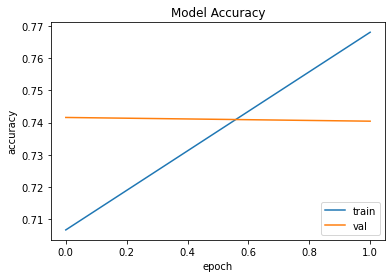

In [24]:
plot_history(history_rnn)

In [25]:
data_score=list()

In [26]:
score= model.evaluate(X_valid, y_val, batch_size=512, verbose=1)
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score.insert(0,'RNN')
data_score.append(score)


45/45 [==============================] - 1s 13ms/step - loss: 0.5167 - accuracy: 0.7323


Test loss: 0.5166900753974915
Test accuracy: 0.7323105335235596


### LSTM

In [27]:
model = Sequential()

model.add(Embedding(input_dim=word_count,input_length=max_length,output_dim=30,trainable=True,mask_zero=True))
model.add(Masking(mask_value=0.0))
model.add(LSTM(64, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
%%time
history_lstm = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/10
319/319 [==============================] - 39s 117ms/step - loss: 0.6651 - accuracy: 0.5477 - val_loss: 0.5253 - val_accuracy: 0.7371
Epoch 2/10
319/319 [==============================] - 36s 112ms/step - loss: 0.4907 - accuracy: 0.7604 - val_loss: 0.5035 - val_accuracy: 0.7430
Epoch 3/10
319/319 [==============================] - 35s 111ms/step - loss: 0.4580 - accuracy: 0.7844 - val_loss: 0.5046 - val_accuracy: 0.7444
Wall time: 1min 50s


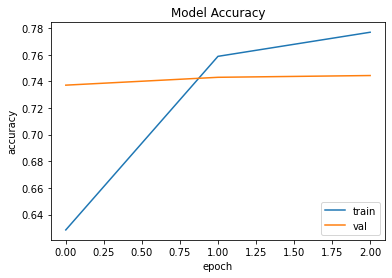

In [29]:
plot_history(history_lstm)

In [30]:
score = model.evaluate(X_valid, y_val, batch_size=512, verbose=1)
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score.insert(0,'LSTM')
data_score.append(score)

45/45 [==============================] - 1s 21ms/step - loss: 0.5115 - accuracy: 0.7412


Test loss: 0.5114826560020447
Test accuracy: 0.7412158846855164


### GRU

In [31]:
model = Sequential()

model.add(Embedding(input_dim=word_count,input_length=max_length,output_dim=30,trainable=True,mask_zero=True))
model.add(Masking(mask_value=0.0))
model.add(GRU(64, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
%%time
history_gru = model.fit(X_train, y_train,
                        batch_size=512,
                        epochs=10,
                        verbose=1,
                        validation_split=0.1,
                        callbacks=[early_stopping])

Epoch 1/10
319/319 [==============================] - 33s 97ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6935 - val_accuracy: 0.5049
Epoch 2/10
319/319 [==============================] - 33s 102ms/step - loss: 0.6933 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.5049
Epoch 3/10
319/319 [==============================] - 30s 95ms/step - loss: 0.6931 - accuracy: 0.5066 - val_loss: 0.6931 - val_accuracy: 0.5049
Wall time: 1min 35s


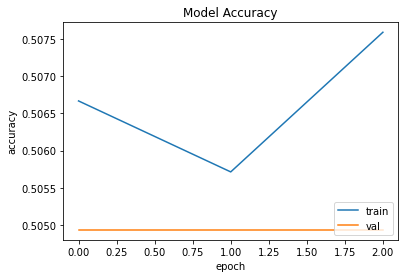

In [33]:
plot_history(history_gru)

In [34]:
score = model.evaluate(X_valid, y_val, batch_size=512, verbose=1)
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score.insert(0,'GRU')
data_score.append(score)

45/45 [==============================] - 1s 20ms/step - loss: 0.6931 - accuracy: 0.5047


Test loss: 0.6931117177009583
Test accuracy: 0.5047392249107361


### CNN

In [35]:
model = Sequential()

model.add(Embedding(input_dim=word_count,input_length=max_length,output_dim=30,trainable=True,mask_zero=True))
model.add(Masking(mask_value=0.0))
model.add(Conv1D(128, 3))
model.add(Activation("relu"))
model.add(GlobalMaxPool1D())
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
history_cnn = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/10
319/319 [==============================] - 12s 37ms/step - loss: 0.6287 - accuracy: 0.6217 - val_loss: 0.5059 - val_accuracy: 0.7412
Epoch 2/10
319/319 [==============================] - 12s 36ms/step - loss: 0.4974 - accuracy: 0.7576 - val_loss: 0.4982 - val_accuracy: 0.7455
Epoch 3/10
319/319 [==============================] - 12s 37ms/step - loss: 0.4624 - accuracy: 0.7801 - val_loss: 0.5023 - val_accuracy: 0.7473


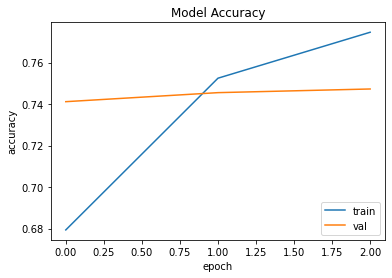

In [37]:
plot_history(history_cnn)

In [38]:
score = model.evaluate(X_valid, y_val, batch_size=512, verbose=1)
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score.insert(0,'CNN')
data_score.append(score)

45/45 [==============================] - 0s 8ms/step - loss: 0.5084 - accuracy: 0.7446


Test loss: 0.5083984136581421
Test accuracy: 0.7446104884147644


### RNN + CNN

In [39]:
model = Sequential()

model.add(Embedding(input_dim=word_count,input_length=max_length,output_dim=30,trainable=True,mask_zero=True))
model.add(Masking(mask_value=0.0))
model.add(Conv1D(128, 3))
model.add(Activation("relu"))
model.add(GlobalMaxPool1D())
model.add(Dense(10))
model.add(Activation("relu"))

# Reshape with the first argument being the number of filter in your last conv layer
model.add(Reshape((10, -1)))
# Just write this Permute after, its complicated why
model.add(Permute((2, 1)))

model.add(LSTM(64, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

    
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
history_rc = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/10
319/319 [==============================] - 15s 41ms/step - loss: 0.6144 - accuracy: 0.6281 - val_loss: 0.4995 - val_accuracy: 0.7464
Epoch 2/10
319/319 [==============================] - 13s 39ms/step - loss: 0.4598 - accuracy: 0.7830 - val_loss: 0.5013 - val_accuracy: 0.7489


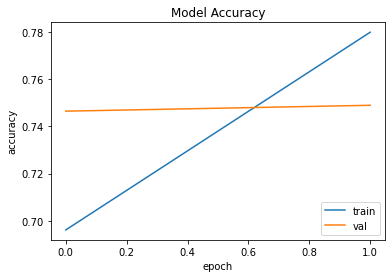

In [41]:
plot_history(history_rc)

In [42]:
score= model.evaluate(X_valid, y_val, batch_size=512, verbose=1)
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score.insert(0,'RNN+CNN')
data_score.append(score)

45/45 [==============================] - 0s 9ms/step - loss: 0.5086 - accuracy: 0.7458


Test loss: 0.5086010694503784
Test accuracy: 0.745800793170929


In [44]:
data = pd.DataFrame(data_score, columns = ['model', 'loss', 'accuracy'])
data

,model,loss,accuracy
0,RNN,0.516690,0.732311
1,LSTM,0.511483,0.741216
2,GRU,0.693112,0.504739
3,CNN,0.508398,0.744610
4,RNN+CNN,0.508601,0.745801


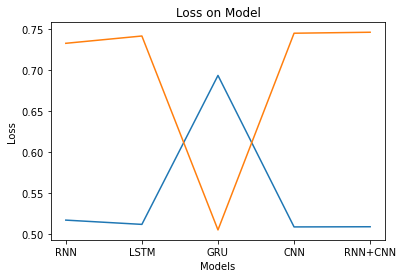

In [45]:
plt.plot(data['model'],data['loss'])
plt.plot(data['model'],data['accuracy'])
plt.title('Loss on Model')
plt.ylabel('Loss')
plt.xlabel('Models')
plt.show()

<b>Итоги: Лучшую точность показала модель RNN+CNN